<a href="https://colab.research.google.com/github/nirvanK11/TELECOM-CUSTOMER-CHURN/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd 
import numpy as np


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

DATA PREPROCESSING 

In [ ]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


DATA CLEANING 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:

df['TotalCharges'].sort_values()

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
df['TotalCharges'] = df.TotalCharges.str.strip()
df = df.replace('', np.nan)
df['TotalCharges'].sort_values()

105      100.2
4459    100.25
1723    100.35
2124     100.4
2208     100.8
         ...  
3826       NaN
4380       NaN
5218       NaN
6670       NaN
6754       NaN
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
df[df.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df.TotalCharges.isna().sum()


11

In [ ]:
df = df.dropna()
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = [col for col in df.columns if col not in num_cols]

In [ ]:
df[cat_cols] = df[cat_cols].astype('category')
df.dtypes

customerID          category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(7032, 21)

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style = 'ticks', font_scale = 1.25, context = 'notebook', rc = custom_params)
blue, red = '#1A74FE', '#FF2626'

IMBALANCED DATA

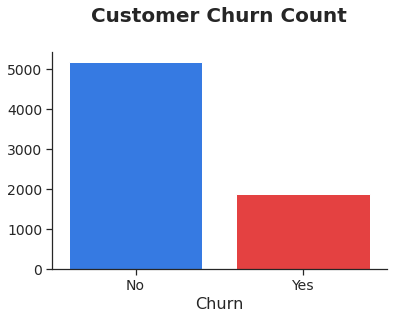

In [ ]:
a = sns.countplot(x=df['Churn'], palette=[blue, red])
a.set_title('Customer Churn Count', fontsize=20, pad=30, fontdict={'weight': 'bold'})
a.set_xlabel('Churn', fontsize=16)
a.set_ylabel('', fontsize=18)
a.tick_params(labelsize=14)

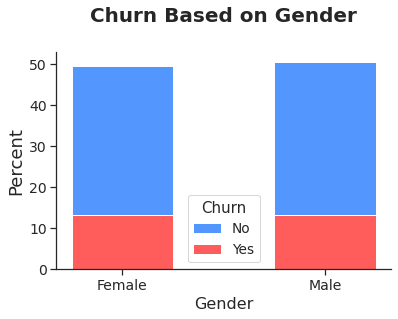

In [ ]:
a = sns.histplot(data=df, x='gender', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
a.set_title('Churn Based on Gender', fontsize=20, pad=30, fontdict={'weight': 'bold'})
a.set_xlabel('Gender', fontsize=16)
a.set_ylabel('Percent', fontsize=18)
a.tick_params(labelsize=14)

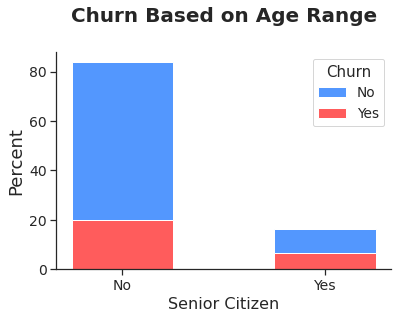

In [ ]:
ax = sns.histplot(data=df, x='SeniorCitizen', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Age Range', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Senior Citizen', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

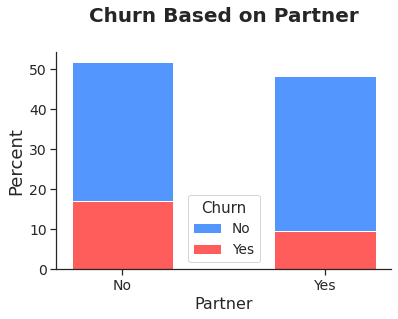

In [ ]:
ax = sns.histplot(data=df, x='Partner', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Partner', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Partner', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

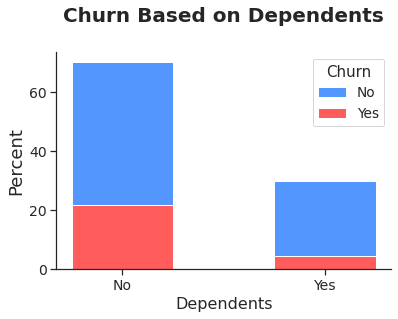

In [ ]:
ax = sns.histplot(data=df, x='Dependents', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Dependents', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Dependents', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

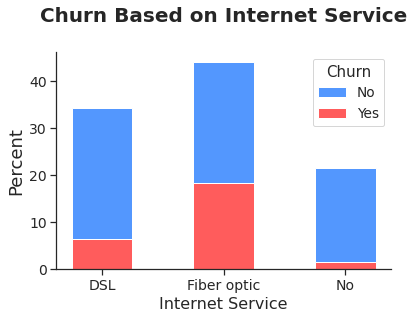

In [ ]:
ax = sns.histplot(data=df, x='InternetService', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Internet Service', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Internet Service', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

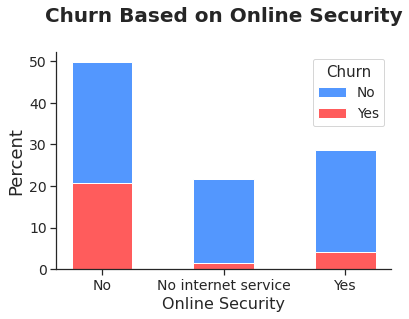

In [ ]:
ax = sns.histplot(data=df, x='OnlineSecurity', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Online Security', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Online Security', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

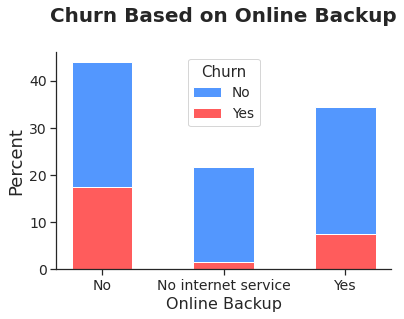

In [ ]:
ax = sns.histplot(data=df, x='OnlineBackup', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Online Backup', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Online Backup', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

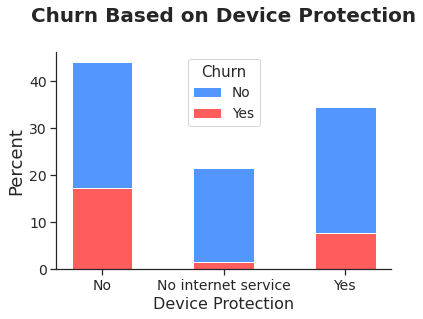

In [ ]:
ax = sns.histplot(data=df, x='DeviceProtection', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Device Protection', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Device Protection', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

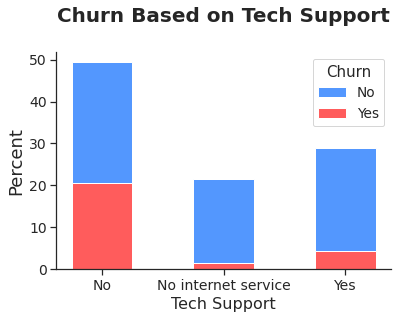

In [ ]:
ax = sns.histplot(data=df, x='TechSupport', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Tech Support', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Tech Support', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

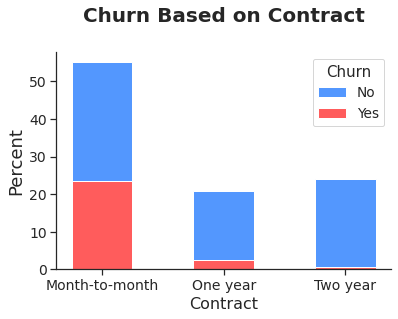

In [ ]:
ax = sns.histplot(data=df, x='Contract', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Contract', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Contract', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

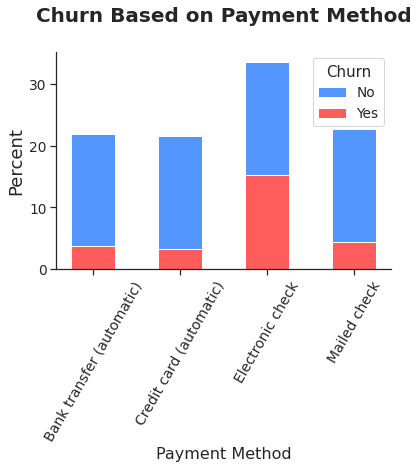

In [ ]:
ax = sns.histplot(data=df, x='PaymentMethod', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Payment Method', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Payment Method', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
# ax.set(ylim=(0, 2500))
ax.tick_params(labelsize=14, axis='x', rotation=60)

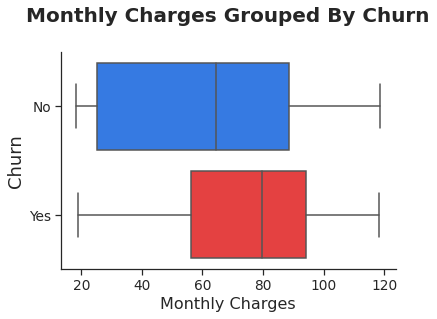

In [ ]:
ax = sns.boxplot(data = df, x = 'MonthlyCharges', y = 'Churn', palette=[blue, red])
ax.set_title('Monthly Charges Grouped By Churn', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Monthly Charges', fontsize=16)
ax.set_ylabel('Churn', fontsize=18)
plt.show()

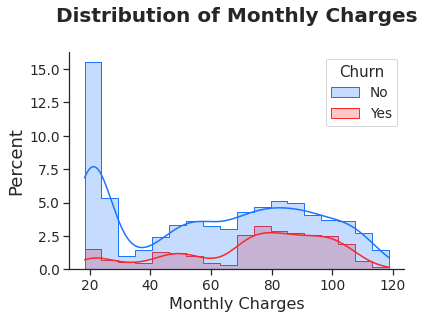

In [ ]:
ax = sns.histplot(data = df, x = 'MonthlyCharges', hue = 'Churn', kde = True, element = 'step', palette=[blue, red], stat='percent')
ax.set_title('Distribution of Monthly Charges', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Monthly Charges', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
plt.show()

In [ ]:
data = df.drop('customerID', axis=1)

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = [col for col in data.columns if col not in num_cols]

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for col in data.columns:
    if (data[col].dtype.name == 'category'):
        data[col] = enc.fit_transform(data[col])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data[num_cols])

MinMaxScaler()

In [ ]:
data[num_cols] = scaler.transform(data[num_cols])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,0.847461,0
7040,0,0,1,1,0.140845,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,0.037809,0
7041,1,1,1,0,0.042254,1,2,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210,1


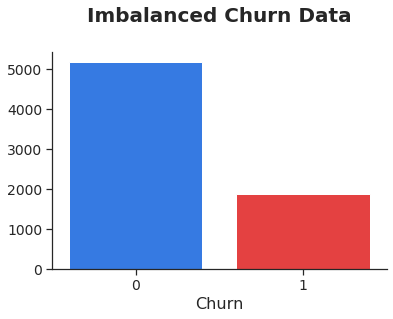

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style = 'ticks', font_scale = 1.25, context = 'notebook', rc = custom_params)
blue, red = '#1A74FE', '#FF2626'

ax = sns.countplot(x=data['Churn'], palette=[blue, red])
ax.set_title('Imbalanced Churn Data', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Churn', fontsize=16)
ax.set_ylabel('', fontsize=18)
ax.tick_params(labelsize=14)


In [ ]:
from imblearn.over_sampling import SMOTENC

In [ ]:
cat_feat = []
for col in cat_cols:
    if col != 'Churn':
        cat_feat.append(data.columns.get_loc(col))
cat_feat

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

smote_nc = SMOTENC(categorical_features=cat_feat, random_state=1, k_neighbors=5, sampling_strategy='minority')
X_res, y_res = smote_nc.fit_resample(X, y)

In [ ]:
X_res

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 1.15422886e-01, 1.27509808e-03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.00000000e+00, 3.85074627e-01, 2.15866605e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.00000000e+00, 3.54228856e-01, 1.03104085e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 7.19071220e-01, 1.18879913e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.00000000e+00, 5.93016518e-01, 1.44405401e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.00000000e+00, 2.75820757e-01, 4.30570782e-03]])

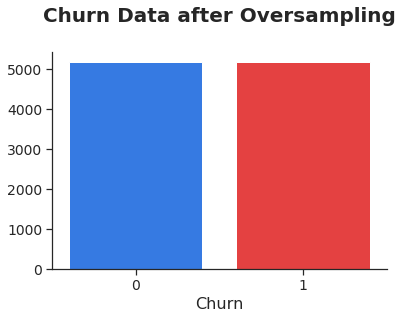

In [ ]:
ax = sns.countplot(x=y_res, palette=[blue, red])
ax.set_title('Churn Data after Oversampling', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Churn', fontsize=16)
ax.set_ylabel('', fontsize=18)
ax.tick_params(labelsize=14)


In [ ]:
data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,0.847461,0
7040,0,0,1,1,0.140845,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,0.037809,0
7041,1,1,1,0,0.042254,1,2,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210,1


In [ ]:
data_res1 = pd.DataFrame(X_res)
data_res1['Churn'] = y_res
data_res1.columns = data.columns
data_res1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.115423,0.001275,0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.385075,0.215867,0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.354229,0.010310,1
3,1.0,0.0,0.0,0.0,0.619718,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.239303,0.210241,0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,0.0,0.0,0.0,0.0,0.358112,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.688003,0.262075,1
10322,1.0,0.0,0.0,0.0,0.975106,1.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.887614,0.858873,1
10323,0.0,0.0,0.0,0.0,0.004515,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.719071,0.011888,1
10324,0.0,0.0,0.0,0.0,0.010980,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,0.593017,0.014441,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   float64
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


In [ ]:
# Splitting Independent & Dependent Fetaures 

X = data_res1.drop('Churn', axis = 1)
y = data_res1['Churn']

In [ ]:
# Creating SMOTE object
smn = SMOTEENN(random_state = 5)

# Creating sample data
X, y = smn.fit_resample(X, y)

In [ ]:
# Splitting dataset for training & testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [ ]:
# Create a random forest object
randm = RandomForestClassifier()

# Train the model
randm.fit(X_train, y_train)

# Predict on test data
randm_pred = randm.predict(X_test)

print('Test Accuracy: {} %'.format(randm.score(X_test, y_test).round(3)*100))

Test Accuracy: 97.39999999999999 %


In [ ]:
# Create a Logistic Regresssion object
log = LogisticRegression()

# Train the model
log.fit(X_train, y_train)

# Predict on test data
log_pred = log.predict(X_test)

print('Test Accuracy: {} %'.format(log.score(X_test, y_test).round(3)*100))

Test Accuracy: 91.5 %


logistic regression 

In [ ]:
print('Confusion Matrix:\n')
print(confusion_matrix(y_test, log_pred))

Confusion Matrix:

[[731  86]
 [ 70 945]]


In [ ]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       817
           1       0.92      0.93      0.92      1015

    accuracy                           0.91      1832
   macro avg       0.91      0.91      0.91      1832
weighted avg       0.91      0.91      0.91      1832



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


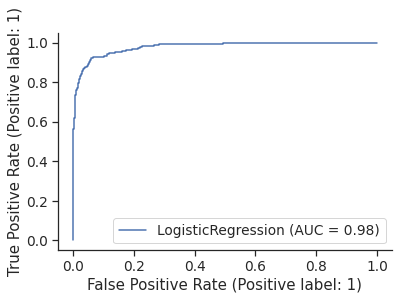

In [ ]:
plot_roc_curve(log, X_test, y_test)  
plt.show()

In [ ]:
# Create a KNN object
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Predict on test data
knn_pred = knn.predict(X_test)

print('Test Accuracy: {} %'.format(knn.score(X_test, y_test).round(3)*100))

Test Accuracy: 95.1 %


In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, knn_pred))

Confusion Matrix:
[[749  68]
 [ 21 994]]


In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       817
           1       0.94      0.98      0.96      1015

    accuracy                           0.95      1832
   macro avg       0.95      0.95      0.95      1832
weighted avg       0.95      0.95      0.95      1832



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


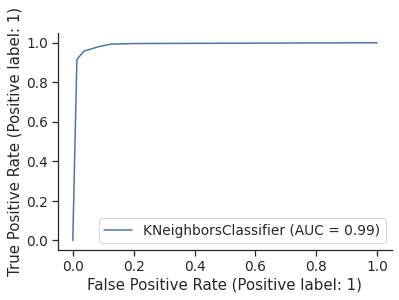

In [ ]:
plot_roc_curve(knn, X_test, y_test)  
plt.show()

In [ ]:
 #Create a SVM object
svc = SVC()

# Train the model
svc.fit(X_train, y_train)

# Predict on test data
svc_pred = svc.predict(X_test)

print('Test Accuracy: {} %'.format(svc.score(X_test, y_test).round(3)*100))

Test Accuracy: 94.39999999999999 %


In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, svc_pred))

Confusion Matrix:
[[760  57]
 [ 45 970]]


In [ ]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       817
           1       0.94      0.96      0.95      1015

    accuracy                           0.94      1832
   macro avg       0.94      0.94      0.94      1832
weighted avg       0.94      0.94      0.94      1832



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


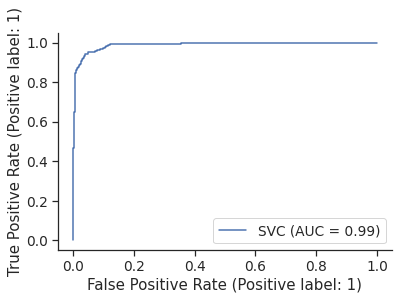

In [ ]:
plot_roc_curve(svc, X_test, y_test)  
plt.show()

In [ ]:
# Create a decision tree object
tree = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=8)

# Train the model
tree.fit(X_train, y_train)

# Predict on test data
tree_pred = tree.predict(X_test)

print('Test Accuracy: {} %'.format(tree.score(X_test, y_test).round(3)*100))

Test Accuracy: 93.4 %


In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, tree_pred))

Confusion Matrix:
[[735  82]
 [ 39 976]]


In [ ]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       817
           1       0.92      0.96      0.94      1015

    accuracy                           0.93      1832
   macro avg       0.94      0.93      0.93      1832
weighted avg       0.93      0.93      0.93      1832



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


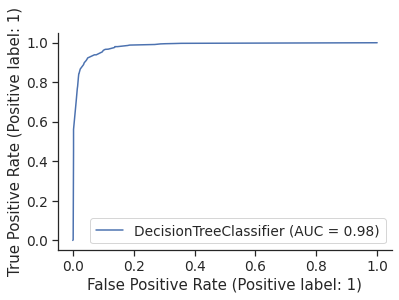

In [ ]:
plot_roc_curve(tree, X_test, y_test)  
plt.show()

In [ ]:
params = {'n_estimators': [i for i in range(100, 1100, 100)],
         'max_depth': [i for i in range(5, 105, 10)],
         'max_features': ['auto', 'sqrt'],
         }

In [ ]:
randmcv = RandomizedSearchCV(randm, params, random_state = 2, n_jobs = -1)

# Train the model
randmcv.fit(X_train, y_train)

print(randmcv.best_score_)
print(randmcv.best_params_)

0.9693501513346205
{'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 55}


In [ ]:
# Create a random forest object with hyperparameters
randm_hy = RandomForestClassifier(n_estimators = 600, max_features = 'auto', max_depth = 45)

# Train the model
randm_hy.fit(X_train, y_train)

# Predict on test data
randm_hy_pred = randm_hy.predict(X_test)

print('Test Accuracy: {} %'.format(randm_hy.score(X_test, y_test).round(3)*100))

Test Accuracy: 97.39999999999999 %


In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, randm_pred))

Confusion Matrix:
[[785  32]
 [ 16 999]]


In [ ]:
print(classification_report(y_test, randm_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       817
           1       0.97      0.98      0.98      1015

    accuracy                           0.97      1832
   macro avg       0.97      0.97      0.97      1832
weighted avg       0.97      0.97      0.97      1832



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


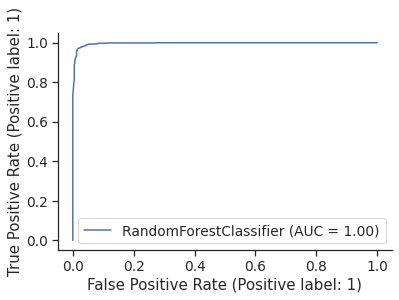

In [ ]:
plot_roc_curve(randm, X_test, y_test)  
plt.show()

In [ ]:
randmcv = RandomizedSearchCV(randm, params, random_state = 2, n_jobs = -1)

# Train the model
randmcv.fit(X_train, y_train)

print(randmcv.best_score_)
print(randmcv.best_params_)

0.9693504252434364
{'n_estimators': 300, 'max_features': 'auto', 'max_depth': 95}


In [ ]:
# Create a random forest object with hyperparameters
randm_hy = RandomForestClassifier(n_estimators = 600, max_features = 'auto', max_depth = 45)

# Train the model
randm_hy.fit(X_train, y_train)

# Predict on test data
randm_hy_pred = randm_hy.predict(X_test)

print('Test Accuracy: {} %'.format(randm_hy.score(X_test, y_test).round(3)*100))

Test Accuracy: 97.39999999999999 %


In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, randm_hy_pred))

Confusion Matrix:
[[ 783   34]
 [  13 1002]]


In [ ]:
score = cross_val_score(randm_hy, X, y, cv = 10)

In [ ]:
print('The average accuracy of the model is'  + "\033[1m" + ' {} %'.format((score.mean().round(3))*100) + "\033[0m")

The average accuracy of the model is 97.89999999999999 %
